In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from urllib.request import urlopen
import json
import plotly.graph_objs as go
import plotly.express as px

In [2]:
Var_Data = pd.read_csv('Prosper Loan Data - Variable Definitions - Sheet1.csv') 
Var_Data.head(10)

Variable                                        Description
0           ListingKey  Unique key for each listing, same value as the...
1        ListingNumber  The number that uniquely identifies the listin...
2  ListingCreationDate                  The date the listing was created.
3          CreditGrade  The Credit rating that was assigned at the tim...
4                 Term        The length of the loan expressed in months.
5           LoanStatus  The current status of the loan: Cancelled,  Ch...
6           ClosedDate  Closed date is applicable for Cancelled, Compl...
7          BorrowerAPR  The Borrower's Annual Percentage Rate (APR) fo...
8         BorrowerRate       The Borrower's interest rate for this loan. 
9          LenderYield  The Lender yield on the loan. Lender yield is ...

In [3]:
#Load Data
LoanData = pd.read_csv('prosperLoanData.csv')
LoanData.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [4]:
LoanData.shape

(113937, 81)

In [5]:
Var_Data.shape

(81, 2)

In [6]:
# check loan Data
LoanData.describe().T

count           mean            std       min  \
ListingNumber                113937.0  627885.692506  328076.236386   4.00000   
Term                         113937.0      40.830248      10.436212  12.00000   
BorrowerAPR                  113912.0       0.218828       0.080364   0.00653   
BorrowerRate                 113937.0       0.192764       0.074818   0.00000   
LenderYield                  113937.0       0.182701       0.074516  -0.01000   
...                               ...            ...            ...       ...   
PercentFunded                113937.0       0.998584       0.017919   0.70000   
Recommendations              113937.0       0.048027       0.332353   0.00000   
InvestmentFromFriendsCount   113937.0       0.023460       0.232412   0.00000   
InvestmentFromFriendsAmount  113937.0      16.550751     294.545422   0.00000   
Investors                    113937.0      80.475228     103.239020   1.00000   

                                      25%           50%           75%  \
ListingNumber                400919.00000  600554.00000  892634.00000   
Term                             36.00000      36.00000      36.00000   
BorrowerAPR                       0.15629       0.20976       0.28381   
BorrowerRate                      0.13400       0.18400       0.25000   
LenderYield                       0.12420       0.17300       0.24000   
...                                   ...           ...           ...   
PercentFunded                     1.00000       1.00000       1.00000   
Recommendations                   0.00000       0.00000       0.00000   
InvestmentFromFriendsCount        0.00000       0.00000       0.00000   
InvestmentFromFriendsAmount       0.00000       0.00000       0.00000   
Investors                         2.00000      44.00000     115.00000   

                                      max  
ListingNumber                1.255725e+06  
Term                         6.000000e+01  
BorrowerAPR                  5.122900e-01  
BorrowerRate                 4.975000e-01  
LenderYield                  4.925000e-01  
...                                   ...  
PercentFunded                1.012500e+00  
Recommendations              3.900000e+01  
InvestmentFromFriendsCount   3.300000e+01  
InvestmentFromFriendsAmount  2.500000e+04  
Investors                    1.189000e+03  

[61 rows x 8 columns]

In [7]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
LoanData.select_dtypes(include=['object']).nunique()

ListingKey                 113066
ListingCreationDate        113064
CreditGrade                     8
LoanStatus                     12
ClosedDate                   2802
ProsperRating (Alpha)           7
BorrowerState                  51
Occupation                     67
EmploymentStatus                8
GroupKey                      706
DateCreditPulled           112992
FirstRecordedCreditLine     11585
IncomeRange                     8
LoanKey                    113066
LoanOriginationDate          1873
LoanOriginationQuarter         33
MemberKey                   90831
dtype: int64

In [9]:
# check duplicated
LoanData[LoanData.duplicated()]

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

[0 rows x 81 columns]

In [10]:
LoanData.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [11]:
LoanData['ListingCreationDate']=pd.to_datetime(LoanData['ListingCreationDate'])

In [12]:
LoanData.ListingCreationDate.dt.year.value_counts()

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: ListingCreationDate, dtype: int64

In [13]:
LoanData.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [14]:
LoanData.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [15]:
LoanData.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [16]:
LoanData[LoanData.ProsperScore == 11].sample(10)

ListingKey  ListingNumber     ListingCreationDate  \
81036   6BAD36000420960128CD607        1141293 2014-01-15 12:55:27.760   
37362   4FB33595989403543F52421        1042520 2013-11-30 17:48:48.700   
103244  0BD33602281487927571455        1171801 2014-02-21 16:18:00.137   
1085    3FBA35963912353000DA0E6        1079667 2013-12-12 03:37:30.163   
113706  DBFD3594908643524852128        1018247 2013-11-14 16:21:07.883   
75274   8EDD359721296369598279E        1028392 2013-12-05 20:28:18.873   
41845   93FB3604357982311FB7D73        1197748 2014-03-08 17:32:29.243   
65942   F13135972828655881E9920        1061558 2013-12-09 05:35:46.017   
56088   F8263601091477349F9F51B        1189962 2014-02-05 13:53:43.293   
91268   5FC8359468345199846796A         995777 2013-11-04 14:10:03.953   

       CreditGrade  Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  \
81036          NaN    60    Current        NaN      0.13250        0.1099   
37362          NaN    36    Current        NaN      0.06726        0.0605   
103244         NaN    60    Current        NaN      0.11421        0.0920   
1085           NaN    36    Current        NaN      0.09434        0.0809   
113706         NaN    36    Current        NaN      0.13799        0.1099   
75274          NaN    36    Current        NaN      0.06726        0.0605   
41845          NaN    36    Current        NaN      0.06726        0.0605   
65942          NaN    60    Current        NaN      0.14658        0.1239   
56088          NaN    60    Current        NaN      0.14147        0.1189   
91268          NaN    36    Current        NaN      0.07922        0.0659   

        LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
81036        0.0999  ...            0.00                0.0   
37362        0.0505  ...          -31.70                0.0   
103244       0.0820  ...            0.00                0.0   
1085         0.0709  ...           -7.22                0.0   
113706       0.0999  ...          -39.26                0.0   
75274        0.0505  ...           -5.85                0.0   
41845        0.0505  ...            0.00                0.0   
65942        0.1139  ...          -24.21                0.0   
56088        0.1089  ...            0.00                0.0   
91268        0.0559  ...           -4.91                0.0   

        LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
81036                     0.0                  0.0   
37362                     0.0                  0.0   
103244                    0.0                  0.0   
1085                      0.0                  0.0   
113706                    0.0                  0.0   
75274                     0.0                  0.0   
41845                     0.0                  0.0   
65942                     0.0                  0.0   
56088                     0.0                  0.0   
91268                     0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
81036                              0.0            1.0                0   
37362                              0.0            1.0                0   
103244                             0.0            1.0                0   
1085                               0.0            1.0                0   
113706                             0.0            1.0                0   
75274                              0.0            1.0                0   
41845                              0.0            1.0                0   
65942                              0.0            1.0                0   
56088                              0.0            1.0                0   
91268                              0.0            1.0                1   

       InvestmentFromFriendsCount InvestmentFromFriendsAmount Investors  
81036                           0                         0.0       222  
37362                           0                         0.0       140  
103244                          

In [17]:
#showing missing values in BorrowerAPR,LoanStatus
LoanData[['BorrowerAPR', 'LoanStatus']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   BorrowerAPR  113912 non-null  float64
 1   LoanStatus   113937 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [18]:
#showing null valus in BorrowerAPR 
LoanData[LoanData['BorrowerAPR'].isnull()]

ListingKey  ListingNumber     ListingCreationDate  \
2543    044B3365298516680DA929B             36 2005-11-28 22:42:42.557   
14632   E4103364750435927B6F892             67 2006-01-06 12:54:51.887   
25166   B3083364738592238DBDA63              6 2005-11-15 16:06:47.457   
25330   B6C33364979883097BBCD77             39 2005-11-29 13:29:16.810   
29773   3480336511078238810A782             21 2005-11-18 14:48:19.753   
39870   B6E73366056348939D8801F             24 2005-11-20 14:45:55.193   
43587   2F123364529418907A58D4C             19 2005-11-18 14:16:59.093   
62297   2F25336514614362295DA03              7 2005-11-15 18:25:56.107   
71280   DED033645500376547AF34E             60 2005-12-29 19:53:41.000   
71875   F50A33647261871547E3E0D             68 2006-01-06 13:05:50.890   
73945   8D5F33655433257693D8033             18 2005-11-18 14:10:50.470   
74114   0B4133652604109810CAA3B             34 2005-11-28 16:16:35.077   
75710   F7C53365521712881842072             25 2005-11-20 20:15:47.240   
78414   468C3366438848688B8B5B4             22 2005-11-18 16:35:48.210   
80369   54A833661083301426FFC90             44 2005-12-03 14:03:22.207   
81848   584D3364403680278BB6704             28 2005-11-21 19:35:46.890   
90598   B87F3364623805558A45EAB             16 2005-11-18 13:39:03.263   
92516   80373365765621932269C34             48 2005-12-05 13:58:06.017   
103509  0E0F336443449038617E9F4             59 2005-12-21 19:37:33.813   
105925  B01233643651103736EE3B6             20 2005-11-18 14:22:34.763   
106465  B8D63366141679436131B1C             23 2005-11-20 13:21:31.993   
106735  97B333660731451030726AF              5 2005-11-11 08:46:17.303   
109027  F59D33647178242776CD53B             40 2005-11-29 20:23:22.770   
111607  84CC3365208034255DDCB47             35 2005-11-28 17:25:43.160   
113921  D21A33647075665665BE266              4 2005-11-09 20:44:28.847   

       CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
2543            HR    36  Completed  2006-01-06 00:00:00          NaN   
14632           AA    36  Completed  2006-04-10 00:00:00          NaN   
25166           AA    36  Completed  2005-11-29 00:00:00          NaN   
25330           AA    36  Completed  2006-03-21 00:00:00          NaN   
29773           AA    36  Completed  2008-06-05 00:00:00          NaN   
39870            C    36  Completed  2006-10-24 00:00:00          NaN   
43587           AA    36  Completed  2005-11-29 00:00:00          NaN   
62297            E    36  Completed  2005-11-30 00:00:00          NaN   
71280            C    36  Completed  2008-04-21 00:00:00          NaN   
71875           AA    36  Completed  2006-07-11 00:00:00          NaN   
73945           HR    36  Completed  2006-01-06 00:00:00          NaN   
74114           AA    36  Completed  2008-12-08 00:00:00          NaN   
75710            C    36  Completed  2005-11-30 00:00:00          NaN   
78414           AA    36  Completed  2006-01-09 00:00:00          NaN   
80369           AA    36  Completed  2006-01-06 00:00:00          NaN   
81848            D    36  Completed  2008-03-18 00:00:00          NaN   
90598            B    36  Completed  2005-11-29 00:00:00          NaN   
92516           AA    36  Completed  2008-07-06 00:00:00          NaN   
103509           A    36  Completed  2008-12-30 00:00:00          NaN   
105925          AA    36  Completed  2005-12-28 00:00:00          NaN   
106465          NC    36  Completed  2006-01-06 00:00:00          NaN   
106735          AA    36  Completed  2006-02-07 00:00:00          NaN   
109027          AA    36  Completed  2006-01-06 00:00:00          NaN   
111607           B    36  Completed  2005-12-08 00:00:00          NaN   
113921          AA    36  Completed  2005-11-25 00:00:00          NaN   

        BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
2543         0.10000       0.0950  ...           -4.02             0.0000   
14632        0.06500       0.0550  ...     

## What is the structure of your dataset?
##### There are 113937 observations for prosper loans with 81 features most features are in float64= 50, int64=11, bool= 3, datetime64 = 5, object=12

## What is/are the main feature(s) of interest in your dataset?¶

##### BorrowerAPR and LoanStatus is the main features of interest
#### What features in the dataset do you think will help support your investigation into your feature(s) of interest
- What's affect factors on a loan’s outcome status?
-What affects the borrower’s APR or interest rate?
-is there's any  differences between loans depending on  large the original loan amount was?

### Cleaning Part

##### Drop rows with missing APR values
##### remove uncompleted data 2005 and 2014 
#### Merge all the past dates for LoanStates into (pastloans)
#### Create column for average Credit Score Range and drop the 2 columns for lower and upper bounds.

In [19]:
# List of columns to use with the features of intrest

Current_col = ['ListingCreationDate',
            'Term',
            'LoanStatus', 
            'BorrowerAPR',
            'ProsperScore', 
            'ListingCategory (numeric)', 
            'BorrowerState', 
            'Occupation', 
            'EmploymentStatus', 
            'EmploymentStatusDuration', 
            'IsBorrowerHomeowner', 
            'CreditScoreRangeLower', 
            'CreditScoreRangeUpper', 
            'IncomeRange', 
            'LoanCurrentDaysDelinquent', 
            'LoanOriginalAmount']


In [20]:
# Copy of the data frame to clean it
loan = LoanData.copy()

# Use only the columns of intrest
new_Loan = loan[Current_col]

# drop the data of 2005 and 2014
new_Loan = new_Loan.loc[~new_Loan.ListingCreationDate.dt.year.isin([2005, 2014])].reset_index().drop('index', axis=1)

In [21]:
# Rename the ProsperRating (Alpha) and ListingCategory (numeric) columns
new_Loan = new_Loan.rename(columns={'ListingCategory (numeric)': 'ListingCategory'})

In [22]:
# Replace the numbers of ListingCategory to Categories
listing_category_dict = {0: 'Not Available',
                         1: 'Debt Consolidation', 
                         2: 'Home Improvement', 
                         3: 'Business', 
                         4: 'Personal Loan', 
                         5: 'Student Use', 
                         6: 'Auto',
                         7: 'Other', 
                         8: 'Baby&Adoption', 
                         9: 'Boat', 
                         10: 'Cosmetic Procedure', 
                         11: 'Engagement Ring', 
                         12: 'Green Loans', 
                         13: 'Household Expenses', 
                         14: 'Large Purchases', 
                         15: 'Medical/Dental', 
                         16: 'Motorcycle', 
                         17: 'RV', 
                         18: 'Taxes', 
                         19: 'Vacation',
                         20: 'Wedding Loans'}

new_Loan.ListingCategory.replace(listing_category_dict, inplace=True)

In [23]:
new_Loan = new_Loan.loc[~new_Loan['BorrowerAPR'].isnull()].reset_index().drop('index', axis=1)

In [24]:
li= ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', 
                            '$1-24,999', '$0', 'Not displayed', 'Not employed']
li.reverse()
li

['Not employed',
 'Not displayed',
 '$0',
 '$1-24,999',
 '$25,000-49,999',
 '$50,000-74,999',
 '$75,000-99,999',
 '$100,000+']

In [25]:
# ordered categories
category_dict = {'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999',
                            '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
            'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
            'Term': [12, 36, 60]}

# converted columns
category_cols = ['EmploymentStatus', 'LoanStatus', 'ListingCategory', 'BorrowerState', 'Occupation']

In [26]:
# Converting ordered categories columns 

for col in category_dict:
    ordered_cat = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = category_dict[col])
    new_Loan[col] = new_Loan[col].astype(ordered_cat)

In [27]:
# Converting other categorical clomuns

for col in category_cols:
    new_Loan[col] = new_Loan[col].astype('category')  

In [28]:
new_Loan['AvgCreditScore'] = (new_Loan.CreditScoreRangeLower + new_Loan.CreditScoreRangeUpper) /2
new_Loan.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis=1, inplace=True)  

In [29]:
new_Loan.LoanStatus.cat.categories

Index(['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted',
       'FinalPaymentInProgress', 'Past Due (1-15 days)',
       'Past Due (16-30 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (>120 days)'],
      dtype='object')

In [30]:
new_Loan.LoanStatus.replace(to_replace=['Past Due (1-15 days)',
                                          'Past Due (16-30 days)',
                                          'Past Due (31-60 days)',
                                          'Past Due (61-90 days)',
                                          'Past Due (91-120 days)',
                                          'Past Due (>120 days)'],
                             value='Past Due', inplace=True)

In [31]:
new_Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103178 entries, 0 to 103177
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        103178 non-null  datetime64[ns]
 1   Term                       103178 non-null  category      
 2   LoanStatus                 103178 non-null  category      
 3   BorrowerAPR                103178 non-null  float64       
 4   ProsperScore               74119 non-null   category      
 5   ListingCategory            103178 non-null  category      
 6   BorrowerState              97688 non-null   category      
 7   Occupation                 100137 non-null  category      
 8   EmploymentStatus           100948 non-null  category      
 9   EmploymentStatusDuration   95578 non-null   float64       
 10  IsBorrowerHomeowner        103178 non-null  bool          
 11  IncomeRange                103178 non-null  category

In [32]:
new_Loan.to_csv('downloads/new_prosper.csv', index=False)

## Univariate Exploration

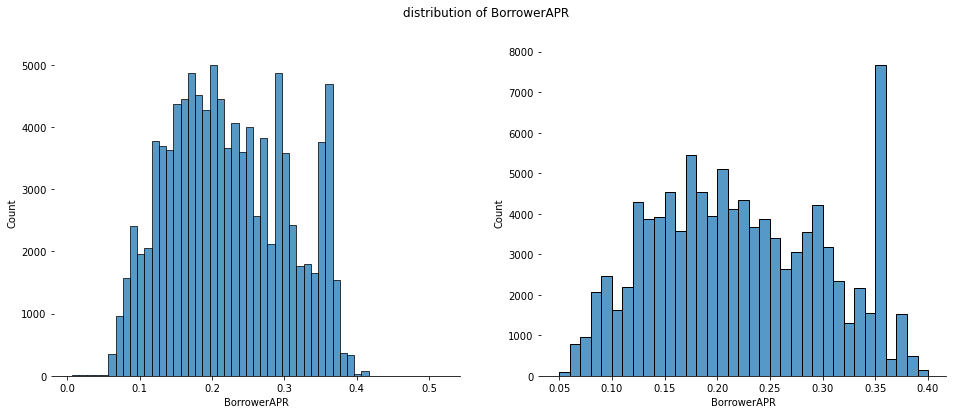

In [41]:
# Ploting the distribution of BorrowerAPR
base_color = sns.color_palette()[0]
fig, ax = plt.subplots(figsize=(16, 6), ncols=2)
sns.histplot(new_Loan.BorrowerAPR, kde=False, color=base_color, binwidth=0.01, ax=ax[0])
sns.despine(left=True)
fig.suptitle('distribution of BorrowerAPR');
sns.histplot(new_Loan.BorrowerAPR, kde=False, color=base_color, binwidth=0.01, ax=ax[1], binrange=[0.05, 0.4])
sns.despine(left=True);

Text(0, 0.5, 'Count of Stautes')

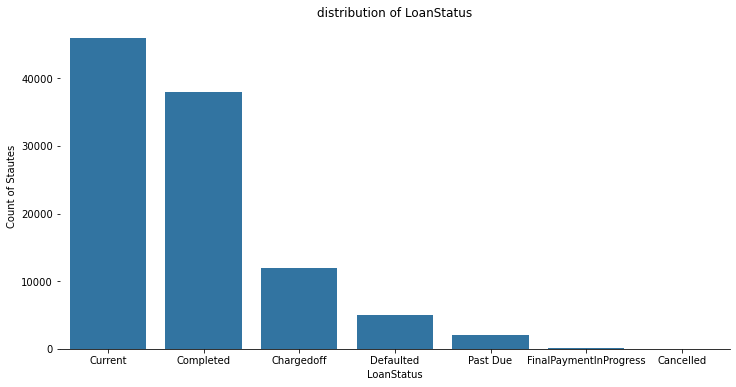

In [57]:
# Ploting the distribution of LoanStatus
LoanStatus_order=new_Loan["LoanStatus"].value_counts().index
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=new_Loan, x='LoanStatus', color=base_color, ax=ax, order=LoanStatus_order).set_title('distribution of LoanStatus')
sns.despine(left=True);
plt.xlabel("LoanStatus", size=10);
plt.ylabel("Count of Stautes", size=10)

#### LoanStatus: 'Current' is large stautes,then followed `completed`, then `Chargedoff` and ` Defaulted` and the rest is less than 400 and `Canceled` loans are almost 0. 

In [174]:
new_Loan.query('BorrowerAPR < 0.01 | BorrowerAPR > 0.45').sort_values('BorrowerAPR')

ListingCreationDate Term  LoanStatus  BorrowerAPR ProsperScore  \
69559 2007-03-24 10:03:30.717   36   Completed      0.00653          NaN   
70958 2006-10-18 06:15:54.327   36   Completed      0.00653          NaN   
48447 2006-10-12 06:03:03.183   36   Defaulted      0.00864          NaN   
16597 2006-03-11 15:43:45.393   36   Defaulted      0.45857          NaN   
94136 2006-03-06 22:36:53.753   36   Defaulted      0.45857          NaN   
20084 2006-03-12 13:44:15.060   36  Chargedoff      0.46201          NaN   
74263 2006-03-02 19:00:17.593   36   Defaulted      0.48873          NaN   
51369 2006-03-16 19:30:16.753   36   Defaulted      0.50633          NaN   
32627 2006-02-23 13:57:02.087   36   Completed      0.51229          NaN   

      ListingCategory BorrowerState               Occupation EmploymentStatus  \
69559   Not Available            MI  Food Service Management        Full-time   
70958   Not Available            NJ                    Other    Not available   
48447   Not Available            PA                 Clerical    Not available   
16597   Not Available           NaN                      NaN              NaN   
94136   Not Available           NaN                      NaN              NaN   
20084   Not Available           NaN                      NaN              NaN   
74263   Not Available           NaN                      NaN              NaN   
51369   Not Available           NaN                      NaN              NaN   
32627   Not Available           NaN                      NaN              NaN   

       EmploymentStatusDuration  IsBorrowerHomeowner    IncomeRange  \
69559                     152.0                False      $1-24,999   
70958                       NaN                False  Not displayed   
48447                       NaN                False  Not displayed   
16597                       NaN                False  Not displayed   
94136                       NaN                False  Not displayed   
20084                       NaN                False  Not displayed   
74263                       NaN                False  Not displayed   
51369                       NaN                False  Not displayed   
32627                       NaN                False  Not displayed   

       LoanCurrentDaysDelinquent  LoanOriginalAmount  AvgCreditScore  
69559                          0                3000           669.5  
70958                          0                5000           609.5  
48447                        194                2600           489.5  
16597                        257                3000             NaN  
94136                        193                2800             NaN  
20084                       1970                1789             NaN  
74263                        225                3000             NaN  
51369                        211                3000             NaN  
32627                          0                1500             NaN

Text(0.5, 0.98, 'loan creation data by year and month')

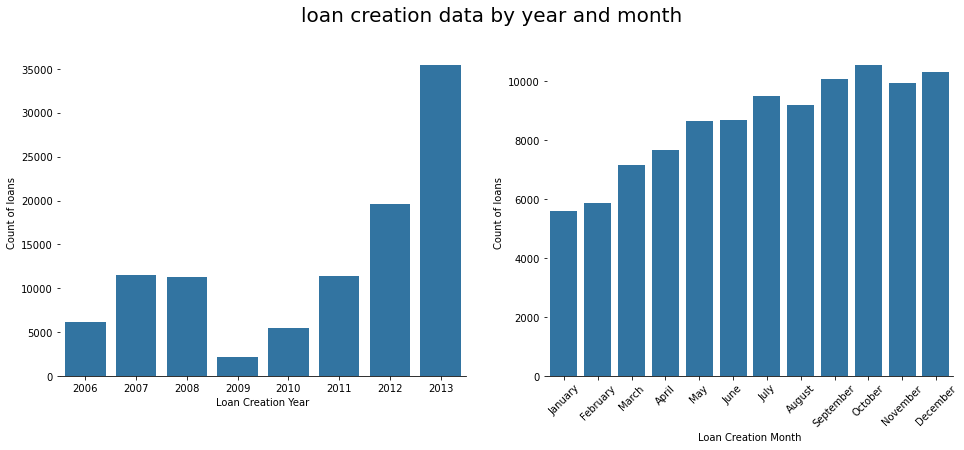

In [52]:
# Creating plots for listing creation data by year and month
fig, ax = plt.subplots(figsize=(16, 6), ncols=2)
g = sns.countplot(x=new_Loan.ListingCreationDate.dt.year, color=base_color, ax=ax[0])
sns.despine(left=True)
g.set(xlabel='Loan Creation Year', ylabel= 'Count of loans');

order = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']
g = sns.countplot(x=new_Loan.ListingCreationDate.dt.month_name(), order=order, color=base_color, ax=ax[1])
sns.despine(left=True)
g.set(xlabel='Loan Creation Month',ylabel= 'Count of loans')
plt.xticks(rotation=45);
fig.suptitle('loan creation data by year and month',fontsize=20)

#### The prosper rating and score distribution is normal, the common used term is 36 Months and common individuals income range falls between (25,000 : 75,000).

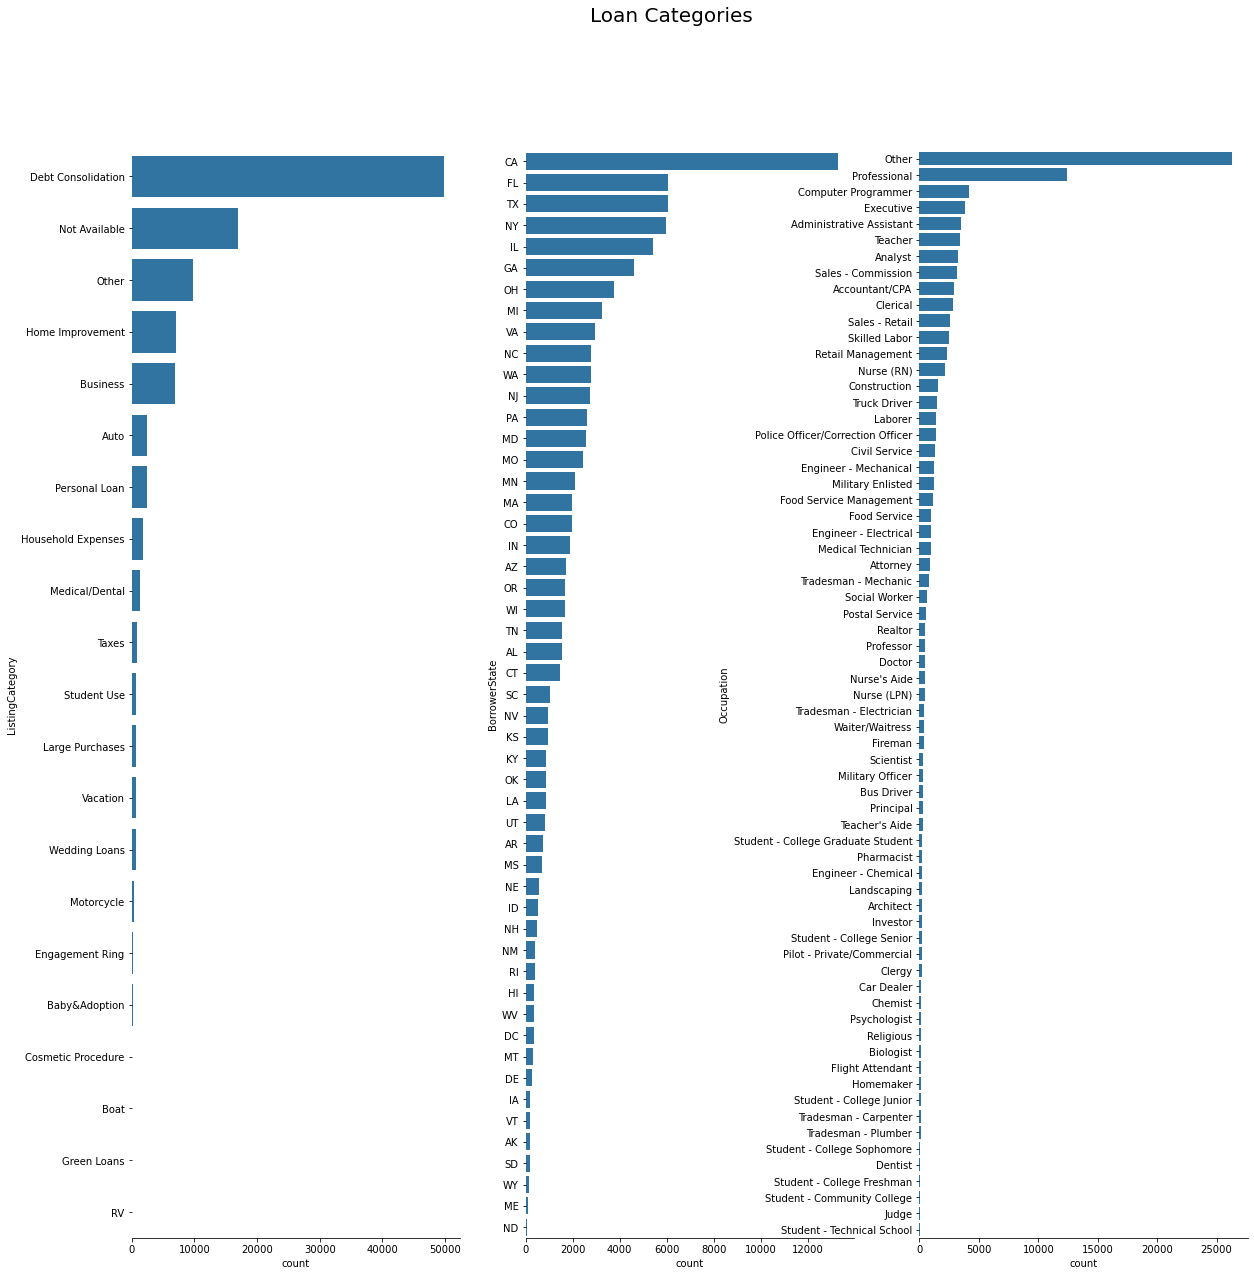

In [60]:
# Listing the columns to plot
cols = ['ListingCategory', 'BorrowerState', 'Occupation']
# Create 3 columns subplots
fig, ax = plt.subplots(figsize=(20, 20), ncols=3)

# Plotting loop
for i, col in enumerate(cols):
    # If the column dtype is ordered category use it`s order if not order by highest value
    if new_Loan[col].cat.ordered:
        order = None
    else:
        order = new_Loan[col].value_counts().index
    
    # Ploting
    sns.countplot(data=new_Loan, y=col, order=order,color=base_color, ax=ax[i])
    sns.despine(left=True)
    fig.suptitle('Loan Categories', fontsize=20)
    

####  Debit consilidation is the top reason for loans  and a lot of people didn't mention the reason.

#### Most of the Borrower was from California followed by Florida and Texas

Text(0.5, 1.0, '% of Borrower Homeowner VS Non Homeowner')

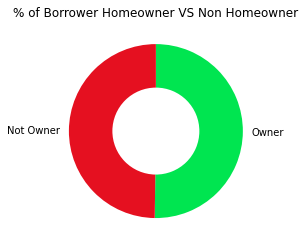

In [177]:
# Preparing for pie plot
isHomeOwner = new_Loan.IsBorrowerHomeowner.value_counts()

# Creating a pie chart for IsBorrowerHomeowner colum
plt.pie(isHomeOwner,
        labels=['Owner', 'Not Owner'],
        startangle=90,
        counterclock=False,
        wedgeprops = {'width' : 0.5},
        colors=['#00e550', '#e51020'])
plt.title('% of Borrower Homeowner VS Non Homeowner')

### 50% of individuals is home owners and  50% the other .

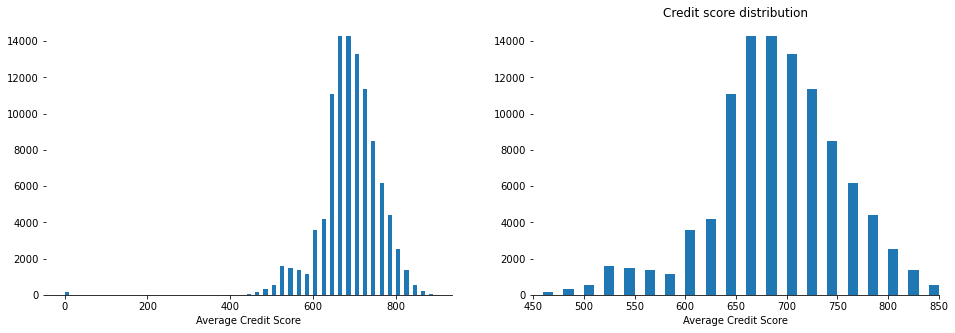

In [178]:
# Ploting Credit score ranges lower and upper
binsize = 10
bins = np.arange(0, new_Loan.AvgCreditScore.max()+binsize, binsize)
# Create a 1x2 Plot
fig, ax = plt.subplots(figsize=(16, 5), ncols=2)

# Ploting AvgCreditScore
ax[0].hist(new_Loan.AvgCreditScore, color=base_color, bins=bins)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel('Average Credit Score');
plt.title('Credit score distribution')
# Ploting AvgCreditScore
ax[1].hist(new_Loan.AvgCreditScore, color=base_color, bins=bins)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xlabel('Average Credit Score')
ax[1].set(xlim=[450, 850]);

- number of loans from 2006 was increased then dropped in 2009 and raised again.
- people willing to borrow money more in the 2nd half of the year.

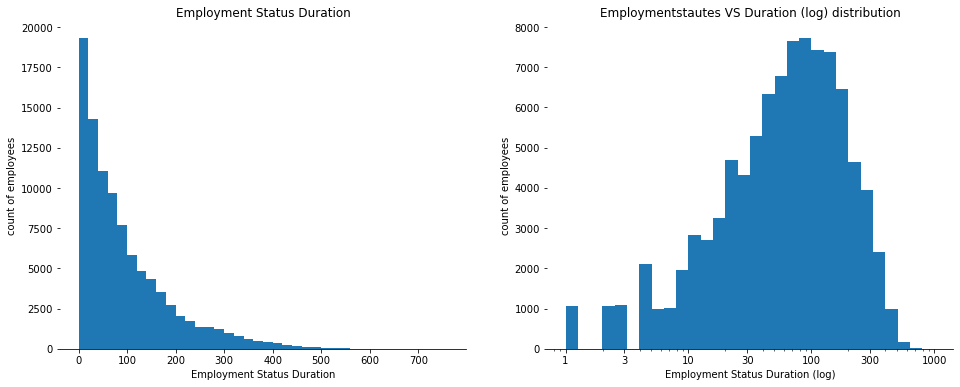

In [70]:
# Ploting the distribution of EmploymentStatusDuration
binsize = 20
bins = np.arange(0, new_Loan.EmploymentStatusDuration.max()+binsize, binsize)
fig, ax = plt.subplots(figsize=(16, 6), ncols=2)
ax[0].hist(new_Loan.EmploymentStatusDuration, color=base_color, bins=bins)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel('Employment Status Duration');
ax[0].set_ylabel('count of employees')
ax[0].set_title('Employment Status Duration');
# Ploting the log of EmploymentStatusDuration
log_bins = 10 ** np.arange(0, 3.0+0.1, 0.1)
ticks = [ 1, 3, 10, 30, 100, 300, 1000]
ax[1].hist(new_Loan.EmploymentStatusDuration, color=base_color, bins=log_bins)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xscale('log')
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(ticks)
ax[1].set_xlabel('Employment Status Duration (log)');
ax[1].set_ylabel('count of employees')
ax[1].set_title('Employmentstautes VS Duration (log) distribution');

- Employment Status Duration has a long-tailed distribution with a lot of emplyees between $0 \to 100$ months in their current position<br> 
- plotted the log-scale, the distribution is roughly normal with a peak around $80 \to 90$ months.

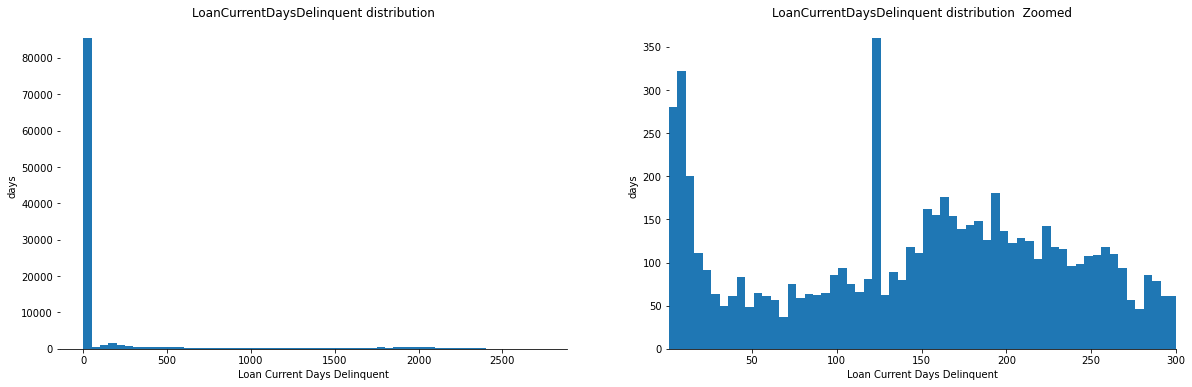

In [73]:
# Ploting LoanCurrentDaysDelinquent
# Create a 2x2 Plot
fig, ax = plt.subplots(figsize=(20, 6), ncols=2)

# Ploting LoanCurrentDaysDelinquent 
binsize_delinquent = 50
bins_delinquent = np.arange(0, new_Loan.LoanCurrentDaysDelinquent.max()+binsize_delinquent, binsize_delinquent)
ax[0].hist(new_Loan.LoanCurrentDaysDelinquent, color=base_color, bins=bins_delinquent)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel('Loan Current Days Delinquent');
ax[0].set_ylabel('days');
ax[0].set_title('LoanCurrentDaysDelinquent distribution')

# Ploting LoanCurrentDaysDelinquent Zoomed in range from 1 to 300
binsize_delinquent_zoomed = 5
bins_delinquent_zoomed = np.arange(1, new_Loan.LoanCurrentDaysDelinquent.max()+binsize_delinquent_zoomed, binsize_delinquent_zoomed)
ax[1].hist(new_Loan.LoanCurrentDaysDelinquent, color=base_color, bins=bins_delinquent_zoomed)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xlabel('Loan Current Days Delinquent')
ax[1].set_ylabel('days');
ax[1].set(xlim=[1, 300]);
ax[1].set_title('LoanCurrentDaysDelinquent distribution  Zoomed');

- Loan delinquent days most users pay on time with most of them with 0 delayed days .
-  from  1→300  is roughly uniform with a peck around 120 days or 4 months and few delayed more than a year and we will go deeper into this and see that those for defaulted loans.

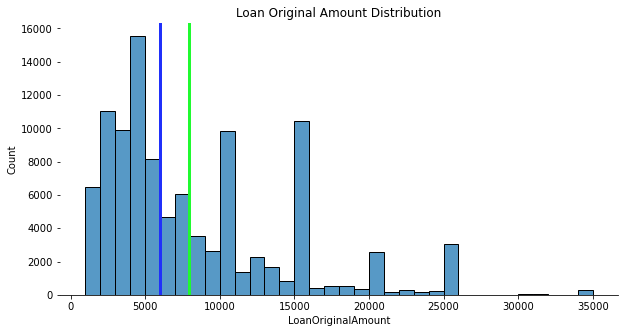

In [181]:
# Ploting Loan Original Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(new_Loan.LoanOriginalAmount, color=base_color, kde=False, binwidth=1000)
sns.despine(left=True)
plt.axvline(x=new_Loan.LoanOriginalAmount.mean(), color='#20fa30', linewidth=3) # Show the mean with a green virtical line
plt.axvline(x=new_Loan.LoanOriginalAmount.median(), color='#2030fa', linewidth=3); # Show the median with a blue virtical line
plt.title('Loan Original Amount Distribution');

- distribution is expected to be right skewed, which is obvious from the histogram, other than couple of peaks. 
- notice that it is quite rare for borrowers to ask for large amount of loans through prosper.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
- 2 variables BorrowerAPR and LoanStatus.
- TAs mentioned above the distribution of BorrowerAPR is roughly normal with a peak around 35% and didn't to perform any kind of transformations.
- LoanStatus: The highes status is Current then completed, Chargedoff and Defaulted and the rest is less than 400 and Canceled loans are almost 0.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
- When investigate number of Loans per year we found a drop in numbers in 2009.
- The most reason for loans is 'Debt Consilidations', Most of individuals were from California state, and top occupations were (other, professional and computer programmer)

## Bivariate Exploration

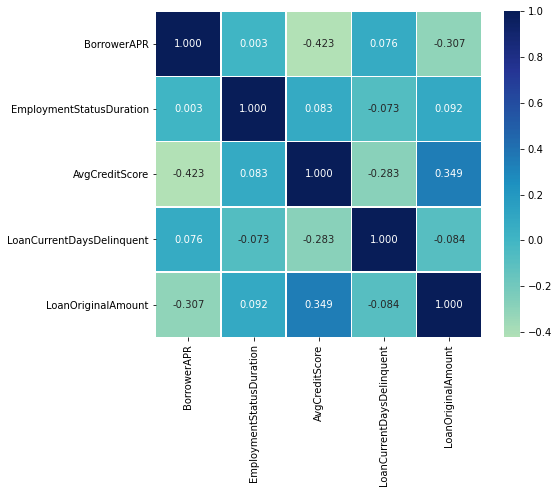

In [85]:
# Listing the numeric variables
num_cols = ['BorrowerAPR', 'ProsperScore', 'EmploymentStatusDuration', 
            'AvgCreditScore', 'LoanCurrentDaysDelinquent', 'LoanOriginalAmount']
# Heatmap Plot
plt.figure(figsize=(8, 6))

sns.heatmap(new_Loan[num_cols].corr(),
            annot=True,
            fmt='.3f',
            cmap='YlGnBu',
            center=0,
            linewidths=.5,
            square=True);

In [183]:
# Sample for Pair Grid
loan_samp = new_Loan.sample(1000)

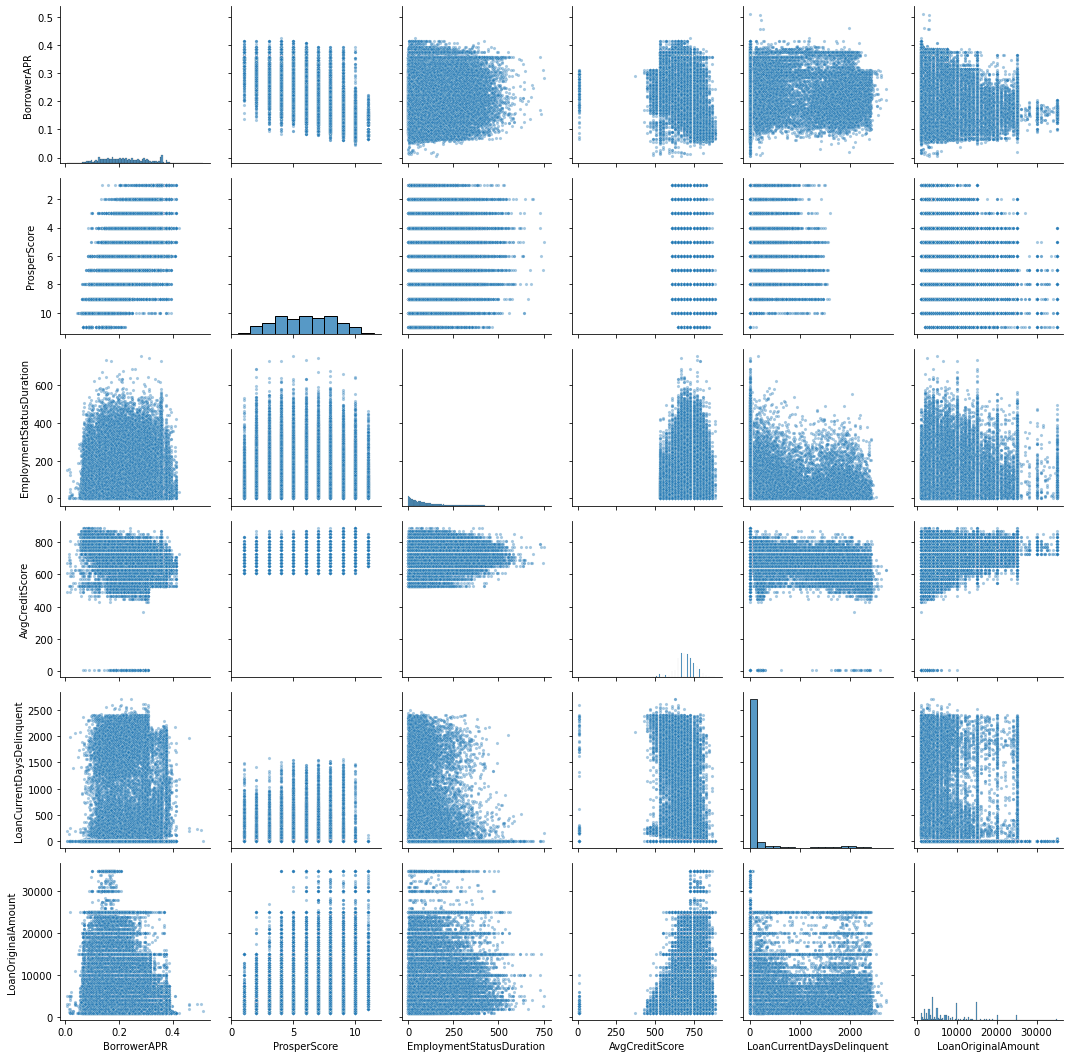

In [184]:
# Pair grid plot for numeric variables
g = sns.PairGrid(data=new_Loan, vars=num_cols)
g = g.map_diag(sns.histplot, kde=False, color=base_color)
g.map_offdiag(sns.scatterplot, color=base_color, alpha=0.4, s=10);
plt.title();

- based on the scatter plots and the correlation matrix there is a negative relationship between `BorrowerAPR` and `LoanOrignalAmount`,  we may expect that the bigger the loan amount the less the interest rate.
- there's a negative relationship between `BorrowerAPR` and `ProsperScore` and expected that the bigger score for the less the interest rate.
- negative relationship between `BorrowerAPR` and `AvgCreditScore` we may expect that the bigger average score the less interest rate.

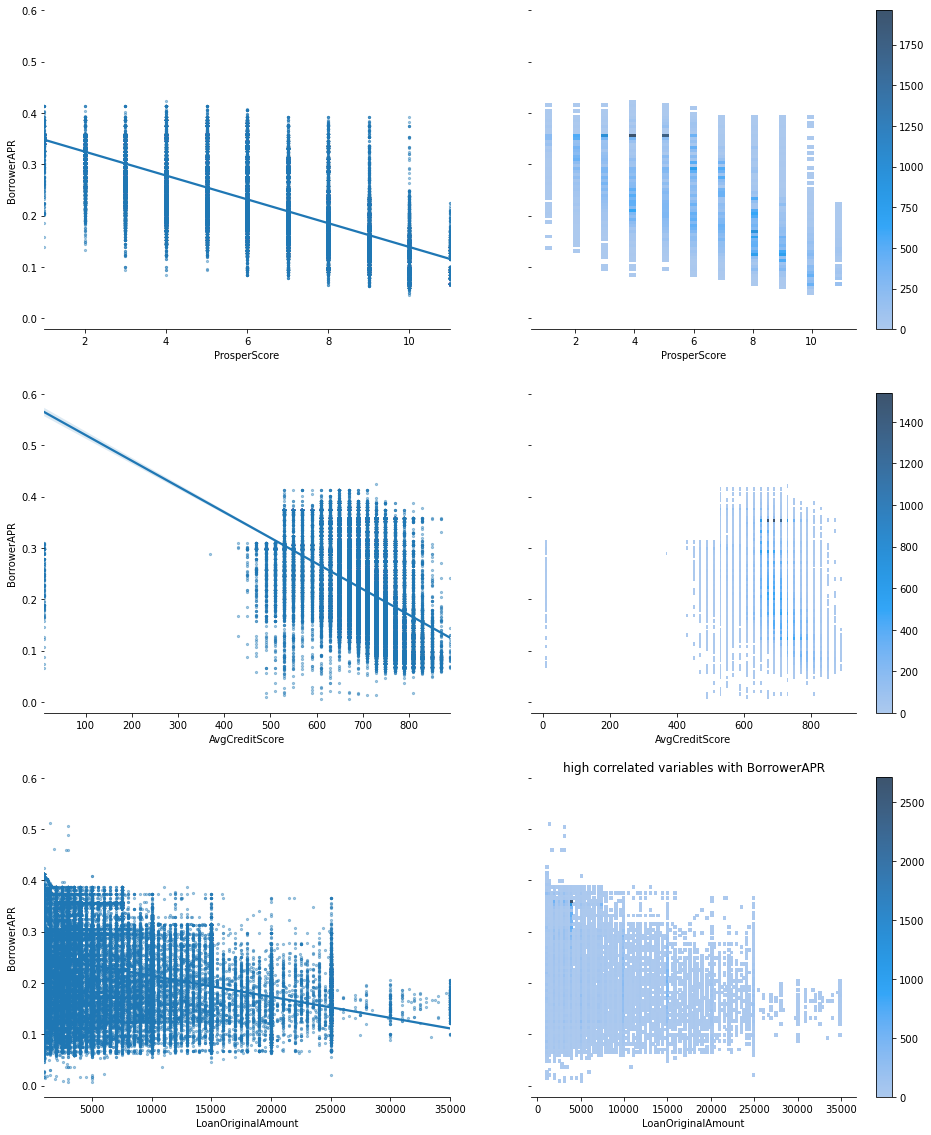

In [81]:
# List the high correlated variables with BorrowerAPR to zoom into their scatter plot
apr_high_corr = ['ProsperScore', 'AvgCreditScore', 'LoanOriginalAmount']

fig, axis = plt.subplots(figsize=(16, 20), nrows=3, ncols=2, sharey=True)
for i, var in enumerate(apr_high_corr):
    sns.regplot(data=new_Loan,
                x=var,
                y='BorrowerAPR',
                color=base_color,
                scatter_kws={'alpha':0.4, 's':5},
                ax=axis[i, 0])
    sns.despine(left=True);

    sns.histplot(x=new_Loan[var].astype('float64'),
                 y=new_Loan.BorrowerAPR,
                 color=base_color,
                 cbar=True,
                 ax=axis[i, 1])
    sns.despine(left=True);
plt.title('high correlated variables with BorrowerAPR');
 

In [186]:
new_Loan.select_dtypes(include=['category', 'bool']).describe()

Term LoanStatus  ProsperScore     ListingCategory BorrowerState  \
count   103178     103178         74119              103178         97688   
unique       3          7            11                  21            51   
top         36    Current             6  Debt Consolidation            CA   
freq     80390      45933         10912               49860         13294   

       Occupation EmploymentStatus IsBorrowerHomeowner     IncomeRange  
count      100137           100948              103178          103178  
unique         67                8                   2               8  
top         Other         Employed                True  $25,000-49,999  
freq        26302            58024               51803           29482

In [187]:
# Listing the categoric variables
cat_cols = ['Term', 'LoanStatus', 'ProsperScore',
            'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange']

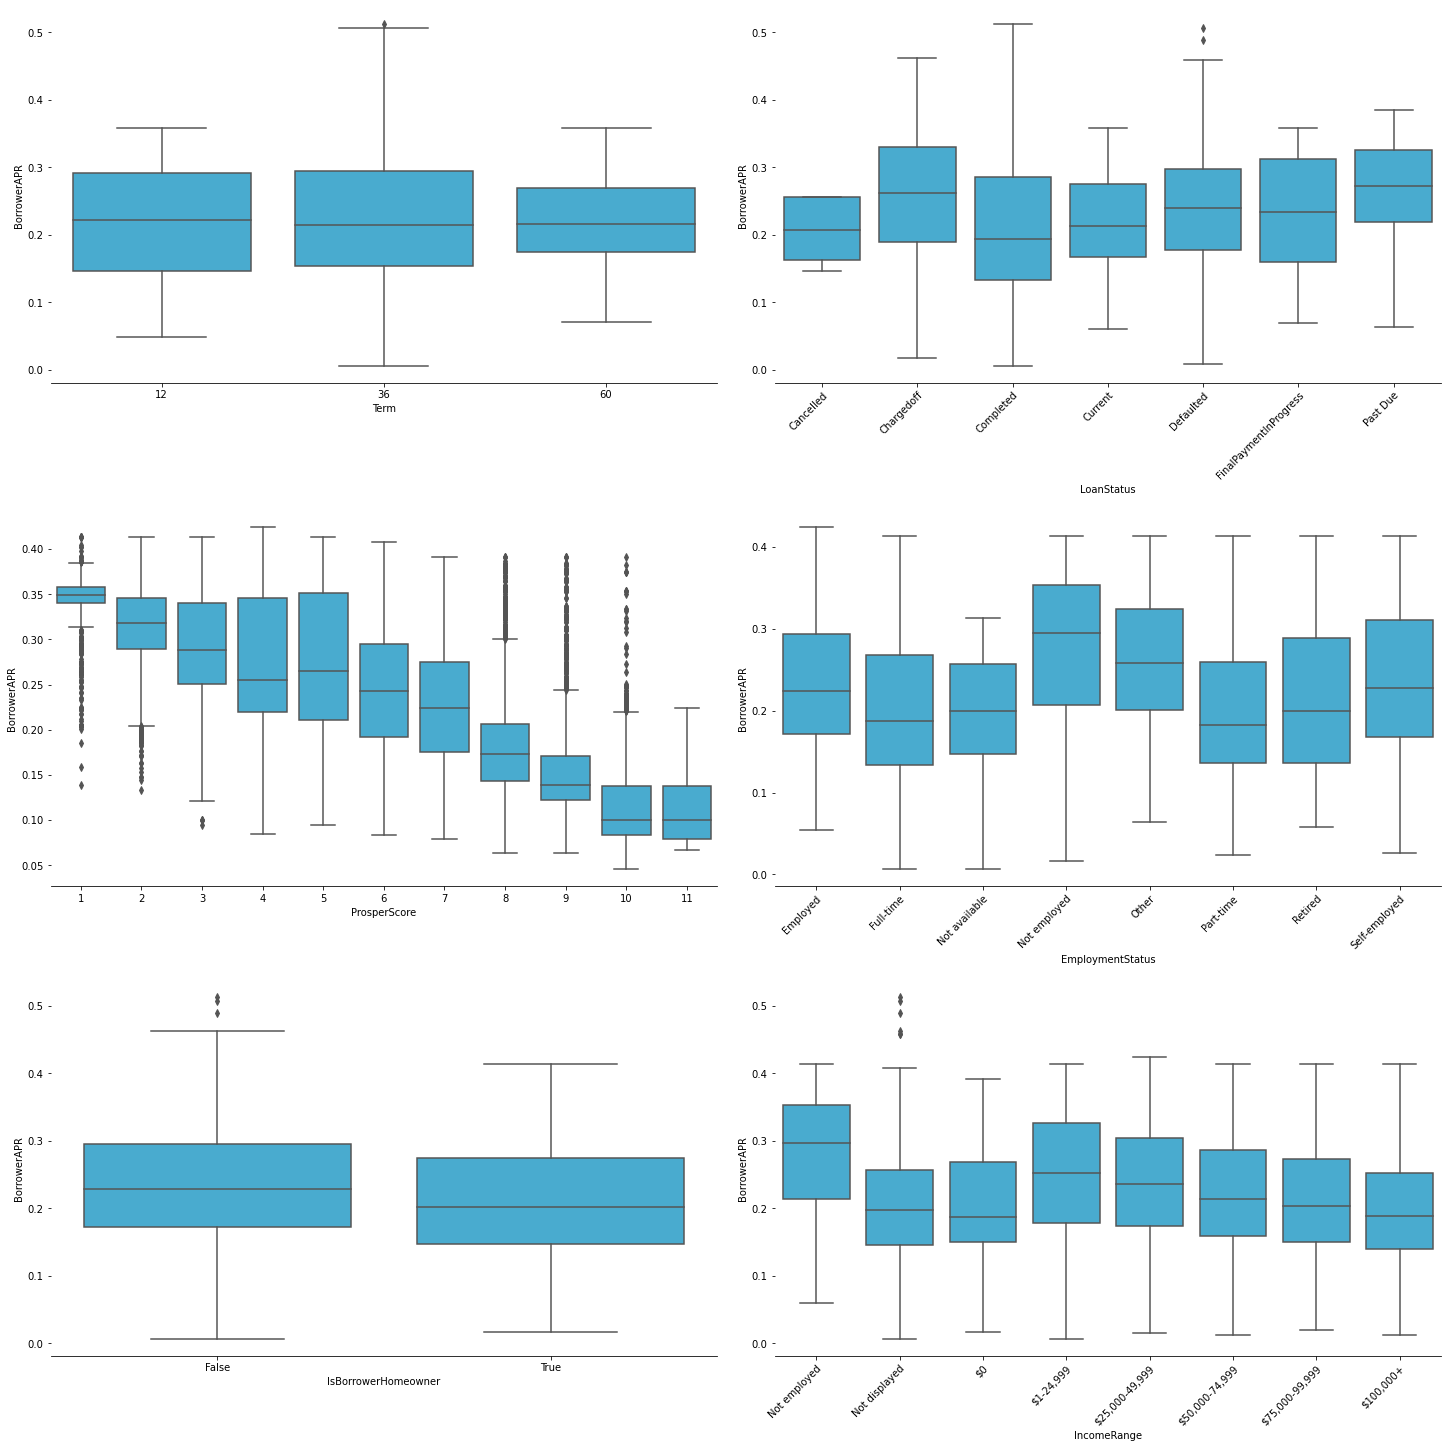

In [188]:
# Creating 3x2 plot for the vars with unique values less than 15
fig1, ax = plt.subplots(figsize=(20, 20), ncols=2, nrows=3, constrained_layout=True) # Constrained_layout to avoid plots overlapping
# Flatten the axis into 1d numpy array
ax = ax.flatten()

# Plotting loop
for i, var in enumerate(cat_cols):
    sns.boxplot(data=new_Loan, x=var, y='BorrowerAPR', color='#33b5e5', ax=ax[i])
    sns.despine(left=True, ax=ax[i])
    if var in ['LoanStatus', 'EmploymentStatus', 'IncomeRange']:
            plt.setp(ax[i].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
           


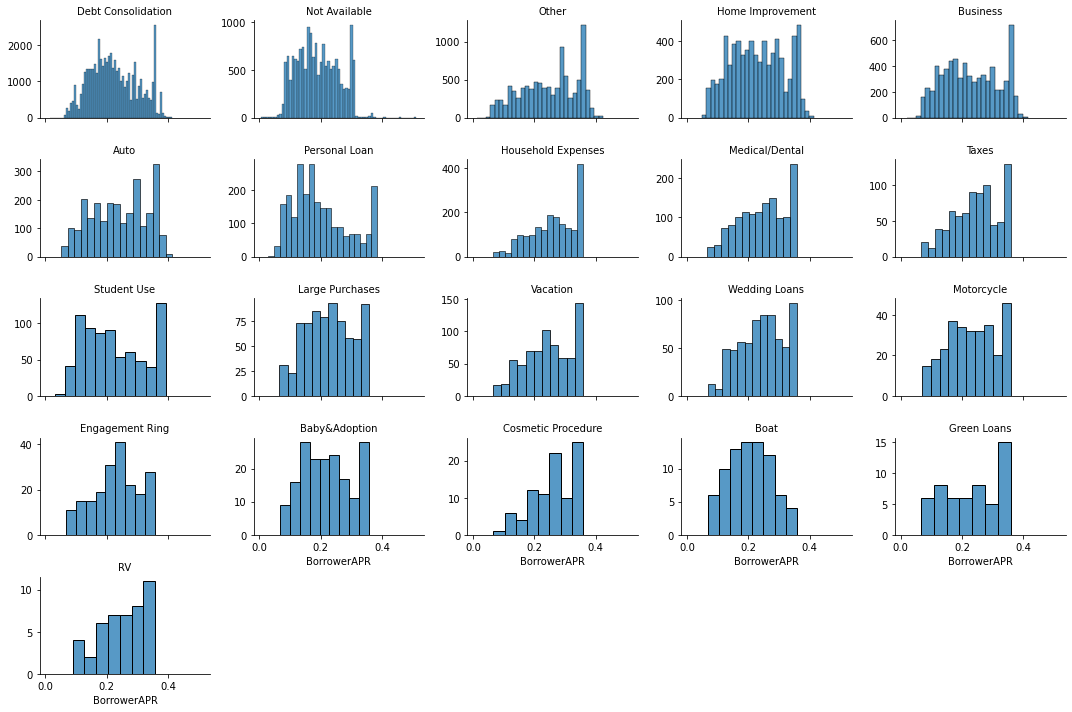

In [189]:
# plotting the distribution for BorrowerAPR by ListingCategory
order = new_Loan.ListingCategory.value_counts().index
g = sns.FacetGrid(data = new_Loan, 
                  col='ListingCategory',
                  col_wrap=5,
                  col_order=order,
                  sharey=False,
                  height=2,
                  aspect=1.5)

g.map(sns.histplot,
      'BorrowerAPR',
      kde=False, 
      color=base_color)
      
g.set_titles('{col_name}');

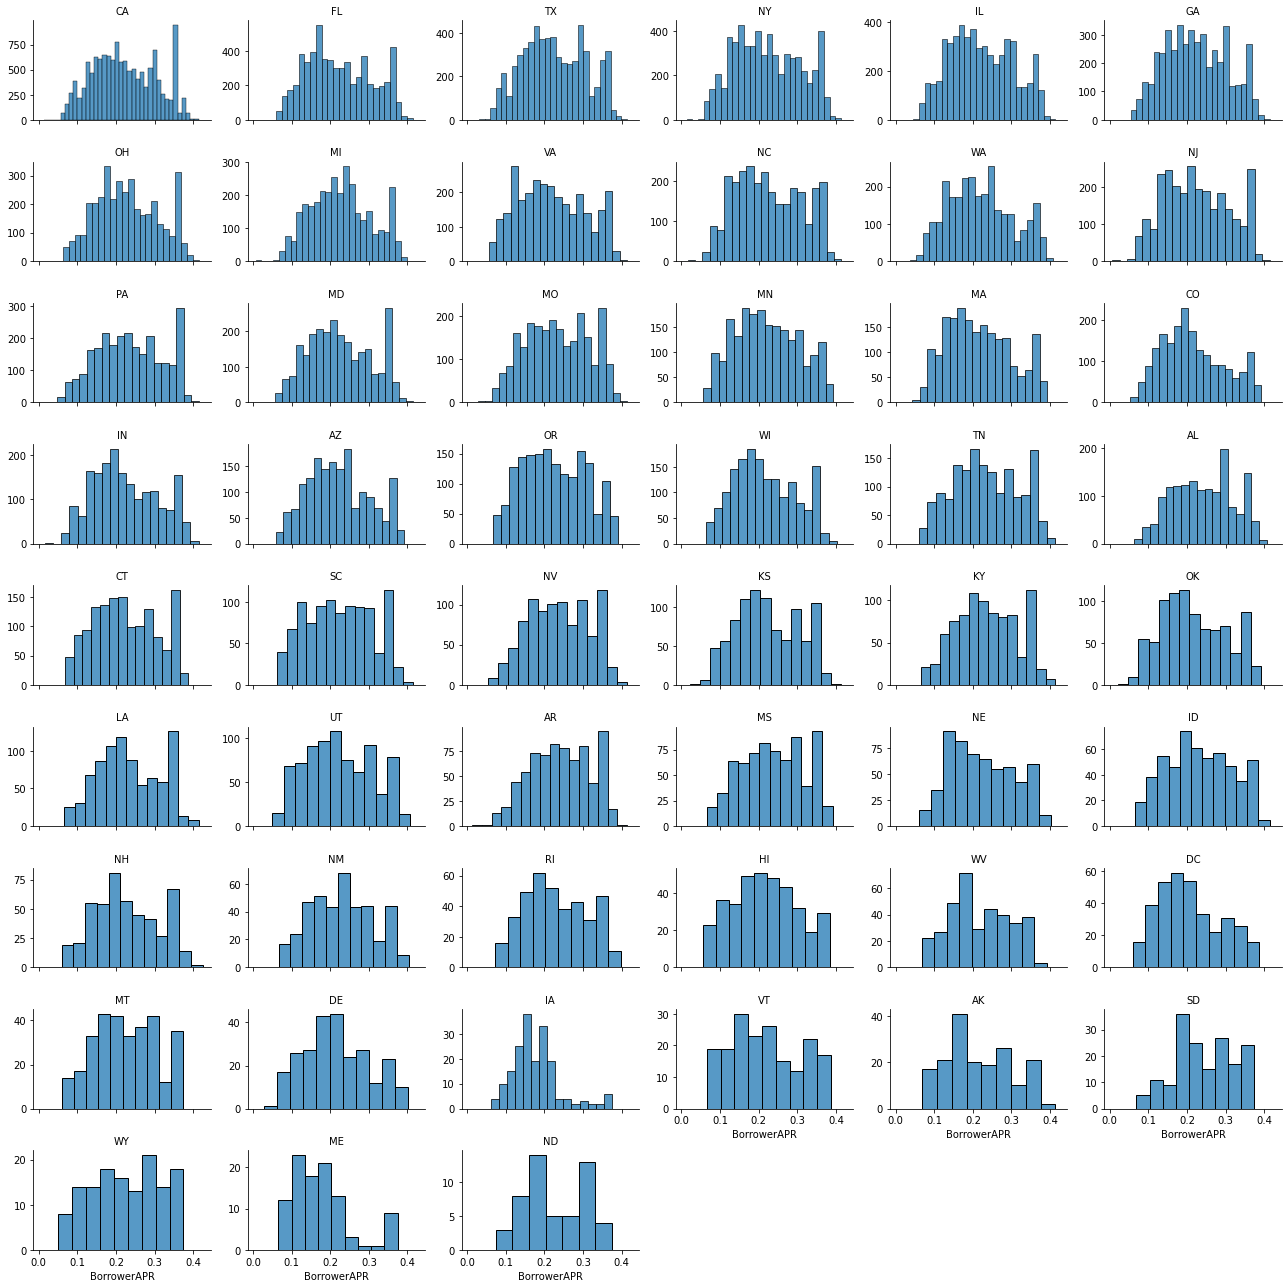

In [190]:
# plotting the distribution for BorrowerAPR by BorrowerState
order = new_Loan.BorrowerState.value_counts().index
g = sns.FacetGrid(data = new_Loan, 
                  col='BorrowerState',
                  col_wrap=6,
                  col_order=order,
                  sharey=False,
                  height=2,
                  aspect=1.5)

g.map(sns.histplot,
      'BorrowerAPR',
      kde=False, 
      color=base_color)
      
g.set_titles('{col_name}');

- No clear relation between BorrowerAPR and the payment Term.
- the lowest median for BorrowerAPR is for Completed followed by Current LoanStatus.
- there's a negative relation between BorrowerAPR and ProsperScore 
- there is a relation between BorrowerAPR and EmploymentStatus as it tends to be lower for emplyed individuals than not employed with some cosiderations for retired and part time jobs to be the lowest.
- the BorrowerAPR tend to be lower for Homeowners than if the individual doesn't own a house.
-  BorrowerAPR tend to be high for not emploed individuals in IncomeRange with some considerations for people with 0 income.
- relation between BorrowerAPR and ListingCategory some reasons tend to get lower rate than others but we will dig more in multivariate exploration to see if this effect because of the ListingCategory or there is another correlated variable that make this effect.
- relation between BorrowerAPR and the BorrowerState and Occupation are not clear.

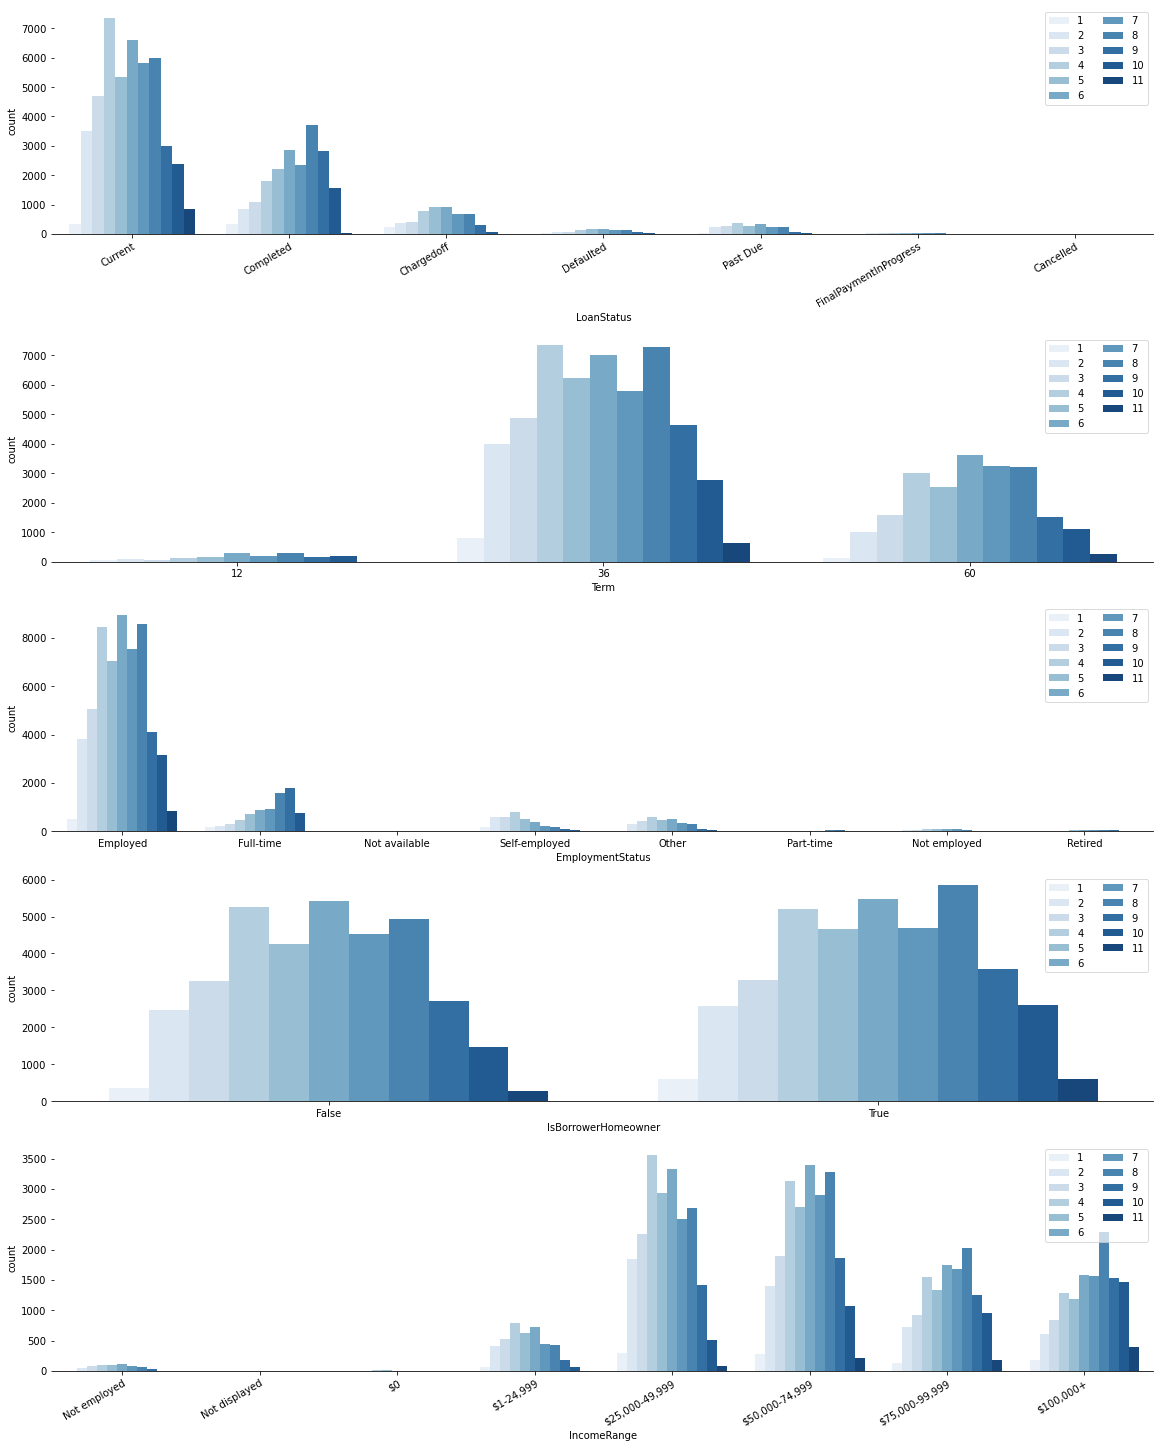

In [191]:
# Listing the columns to plot
cols = ['LoanStatus', 'Term', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange']

# Create 5 rows subplots
fig, ax = plt.subplots(figsize=(16, 20), nrows=5, constrained_layout=True)

# Plotting loop
for i, col in enumerate(cols):
    # If the column dtype is ordered category use it`s order if not order by highest value
    try:
        if new_Loan[col].cat.ordered:
            order = None
        else:
            order = new_Loan[col].value_counts().index
    except:
        order = None
        pass
    
    # Ploting
    sns.countplot(data=new_Loan, x=col, order=order, hue='ProsperScore', palette='Blues', ax=ax[i])
    sns.despine(left=True)
    ax[i].legend(loc=1, ncol=2, framealpha=.7)
    # Prevent the ticks from overlapping for IncomeRange and LoanStatus
    if col in ['IncomeRange', 'LoanStatus']:
        plt.setp(ax[i].get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

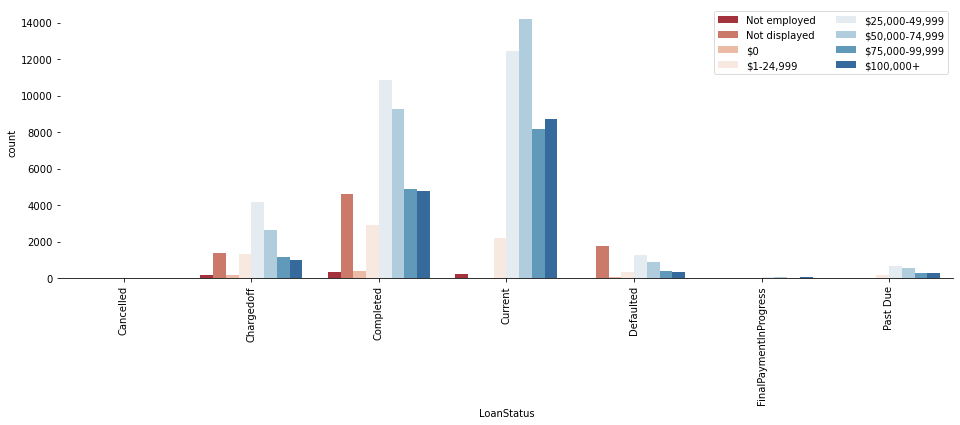

In [192]:
# Ploting countplot for LoanStatus by IncomeRange
# Create 5 rows subplots
fig, ax = plt.subplots(figsize=(16, 5))

# Ploting
sns.countplot(data=new_Loan, x='LoanStatus', hue='IncomeRange', palette='RdBu', ax=ax)
sns.despine(left=True)
ax.legend(loc=1, ncol=2, framealpha=.7);
plt.xticks(rotation=90);

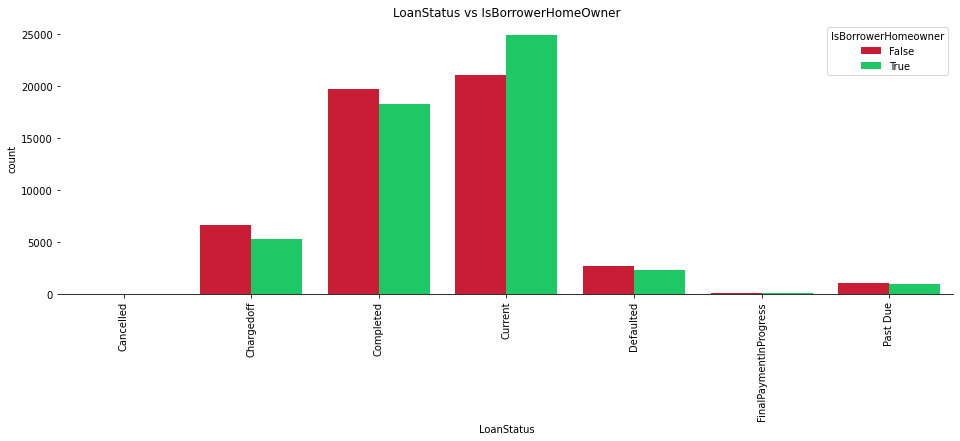

In [193]:
# LoanStatus vs IsBorrowerHomeOwner
plt.figure(figsize=(16, 5))

sns.countplot(data=new_Loan,
              x='LoanStatus',
              hue='IsBorrowerHomeowner',
              palette=['#e50020', '#00e560'])
sns.despine(left=True)
plt.xticks(rotation=90);
plt.title('LoanStatus vs IsBorrowerHomeOwner');

In [88]:
# Preparing for HeatMap plot 
df_loan_employment = new_Loan.groupby(['LoanStatus', 'EmploymentStatus']).count()['ListingCreationDate'].reset_index()
df_loan_employment.columns = ['LoanStatus', 'EmploymentStatus', 'Count']
df_loan_employment = df_loan_employment.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'Count').fillna(0)

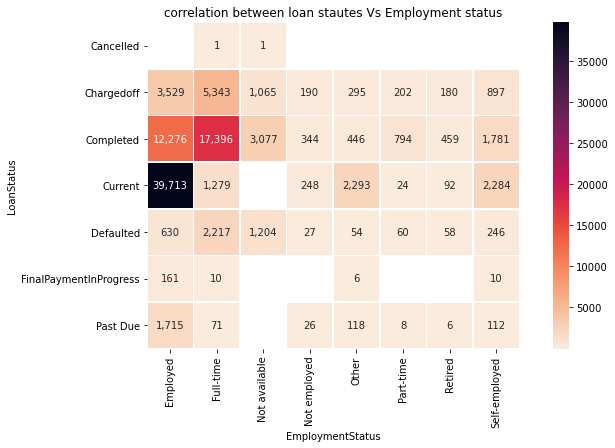

In [89]:
# Heatmap Plot
plt.figure(figsize=(12, 6))
sns.heatmap(df_loan_employment,
            annot=True,
            fmt=',.0f',
            cmap='rocket_r',
            mask=(df_loan_employment<0.5),
            linewidths=.5,
            square=True);
plt.title('correlation between loan stautes Vs Employment status');

- the distribution of `IncomeRange` vary accross the `LoanStatus` 
- 0 Not displayed `IncomeRange` for current loans which means that the policy of the website changed lately.
- Most of Defaulted loans were for individuals who didn't displayed their income.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- LoanOriginalAmount, ProsperScore and AvgCreditScore are the most features that affect the BorrowerAPR as the larger they are the lower the interest rate is.
- LoanStatus is effected the most by IncomeRange and EmploymentStatus as most of defaulted loans are for people who were unemployed.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- AvgCreditScore and LoanOriginalAmount is positively correlated we can expect that the higher score the higher the loan amount the individual can borrow.
- The highest total LoanOriginalAmount was for individuals who are located in California state.

## Multivariate Exploration

In [196]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 12, 1)
    bins_y = np.arange(0, 0.6, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

In [197]:
df_hist2d = new_Loan.query('EmploymentStatus != "Not available"').copy()

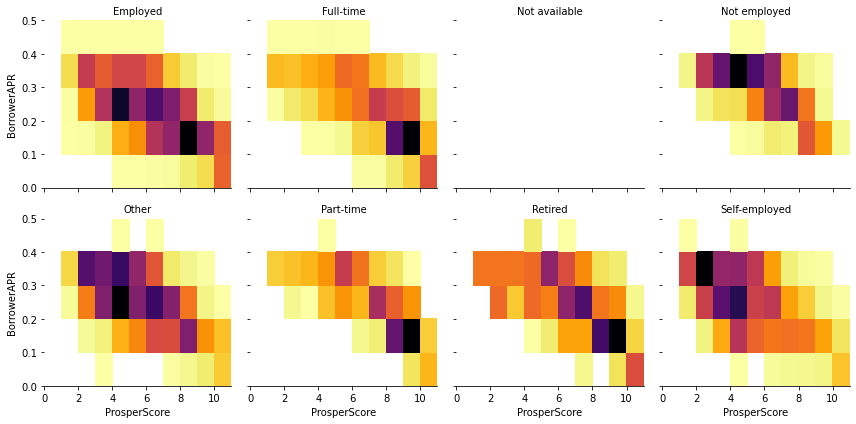

In [198]:
# Ploting heatmap for ProsperScore and BorrowerAPR by EmploymentStatus
g = sns.FacetGrid(data = df_hist2d,
                 col='EmploymentStatus',
                 col_wrap = 4,
                 height = 3)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'inferno_r')
g.set_titles('{col_name}')
g.despine(left=True);

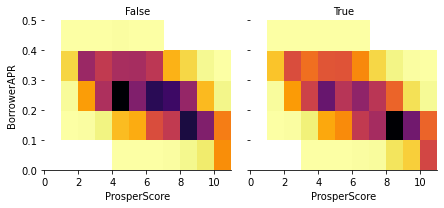

In [199]:
# Ploting heatmap for ProsperScore and BorrowerAPR by IsBorrowerHomeowner
g = sns.FacetGrid(data = df_hist2d,
                 col='IsBorrowerHomeowner',
                 col_wrap = 4,
                 height = 3)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'inferno_r')
g.set_titles('{col_name}')
g.despine(left=True);

<__array_function__ internals>:5: UserWarning:


C:\Users\masel\.jupyter\New folder\lib\site-packages\numpy\core\_asarray.py:83: UserWarning:




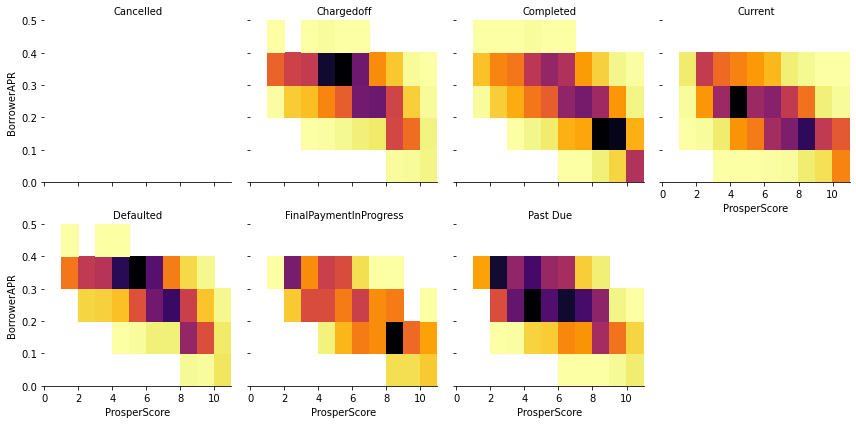

In [200]:
# Ploting heatmap for ProsperScore and BorrowerAPR by LoanStatus
g = sns.FacetGrid(data = df_hist2d,
                 col='LoanStatus',
                 col_wrap = 4,
                 height = 3)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'inferno_r')
g.set_titles('{col_name}')
g.despine(left=True);

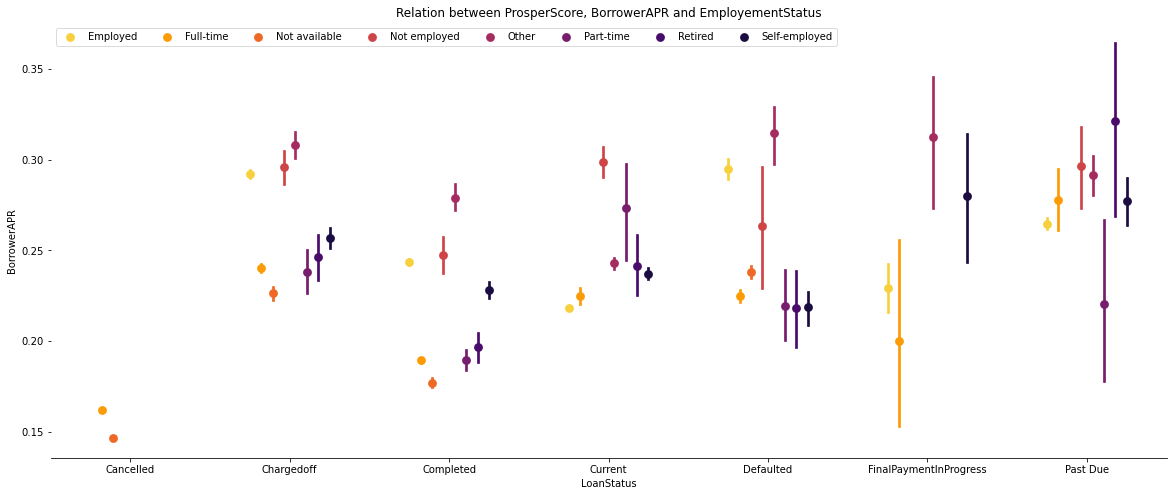

In [77]:
# Plotting the relation between ProsperScore, BorrowerAPR and EmployementStatus
fig, ax = plt.subplots(figsize=(20, 8))
sns.pointplot(data=new_Loan,
               x='LoanStatus',
               y='BorrowerAPR',
               hue='EmploymentStatus',
               linestyles="",
               dodge=0.5,
               palette='inferno_r')
sns.despine(left=True)
plt.legend(loc=2, ncol=8, framealpha=0.7)
plt.title('Relation between ProsperScore, BorrowerAPR and EmployementStatus');
plt.show();

In [202]:
# Creating a df for map plotting
df_scatter = new_Loan.copy()
df_scatter['year'] = df_scatter.ListingCreationDate.dt.year
df_scatter = df_scatter[['BorrowerState',
                         'year',
                         'LoanOriginalAmount',
                         'BorrowerAPR',
                         'ListingCreationDate']].groupby(['BorrowerState', 'year']).agg({'BorrowerAPR':'mean',
                                                                                         'LoanOriginalAmount':'mean',
                                                                                         'ListingCreationDate':'count'}).reset_index()
df_scatter.columns = ['state', 'year', 'AverageAPR', 'AverageLoanAmount', 'count']

# Setting the text for hovering over the state
df_scatter.head()

state  year  AverageAPR  AverageLoanAmount  count
0    AK  2006    0.099095        2500.000000      2
1    AK  2007    0.129788        7476.923077     13
2    AK  2008    0.166376        5676.333333     18
3    AK  2009    0.199480        8500.000000      2
4    AK  2010    0.287690        5245.454545     11

In [203]:
# Plotting animated scatter
fig = px.scatter(df_scatter,
                 x="AverageLoanAmount",
                 y="AverageAPR",
                 animation_frame="year",
                 animation_group="state",
                 size="count",
                 color="state",
                 size_max=50)


fig.layout.update(title_text="Average BorrowerAPR vs Average Orignal Amount by State (2006-2013)",
                  title_font_size=14,
                  showlegend=True,
                  transition= {'duration':20000000})

fig.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?¶
I extended my investigation of borrower APR against loan amount by looking at the impact of the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. I then explored the rating and term effects on loan amount, it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

#### Were there any interesting or surprising interactions between features?
A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.